In [1]:
import pandas as pd
import numpy as np
import random
import datetime as dt
import calendar
import os
#loads data using all filepaths
import glob
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
timestr = time.strftime("%Y%m%d-%H%M%S")
print (timestr)

20220816-203655


In [3]:
#phone: [Price, Weight (1-12, 12 being the most frequntly purchased)]
phones = { 'iPhone 13':[1000, 12],
          'iPhone 12':[700,8],
          'Samsung Galexy S22':[1100,10],
          'Samsung Galexy S21':[800,7],
          'Samsung Galexy S10':[300,4],
          'Huawei':[350,7],
          'Nokia c200':[400,4],
          'Google Android': [900,6],
          'iPhone 11':[500, 9],
          'Sony Xperia 10':[700,5],
          'Sony Xperia 5':[450,4],
          'Nokia c100':[200,2]}

In [4]:
# Columns for Dataframe
columns = ['Order ID', 'Phone', 'Quatity Ordered', 'Price Each', 'Order Date', 'Purchase Country_City']

In [5]:
def gen_random_country_city():
    
    companies = ['Sim_Company_1','Sim_Company_2','Sim_Company_3','Sim_Company_4','Sim_Company_5','Sim_Company_6','Sim_Company_7','Sim_Company_8','Sim_Company_9','Sim_Company_10',
               'Sim_Company_11','Sim_Company_12','Sim_Company_13','Sim_Company_14','Sim_Company_15','Sim_Company_16','Sim_Company_17','Sim_Company_18','Sim_Company_19','Sim_Company_20']
    countries = ["China","India","United States","Indonesia","Brazil","Russia","Japan","Mexico","Nigeria","Philippines",
              "Germany","Vietnam","Bangladesh","Turkey","Iran","Egypt","Pakistan","Thailand","Italy","South Africa"]
    weights = [30, 29, 26, 26, 25, 23, 20, 19, 18, 18, 18, 16, 16, 15, 15, 14, 12, 11, 10, 10]
    cities = ["Beijing","Delhi","Boston","Jakarta","Sao Paulo","Moscow","Yokohama","Mexico City","Lagos","Manila",
            "Munich","Hanoi","Dhaka","Ankara","Isfahan","Giza","Islamabad","Bangkok","Milan","Durban"]
    
    index = random.choices(range(len(countries)), weights = weights)[0]
    
    return f"{companies[index]},{cities[index]}, {countries[index]}"



In [6]:
#genderate random date/time in 
def generate_random_dt(month):
    day_range = calendar.monthrange(2022,month)[1]
    random_day = random.randint(1, day_range)
    if random.random() < 0.5:
        date = dt.datetime(2022,month, random_day, 12, 0)
    else:
        date = dt.datetime(2022,month, random_day, 20, 0)
        
    time_offset = np.random.normal(loc=0, scale = 180)
    final_date = date + dt.timedelta(minutes=time_offset)
    
    return final_date.strftime("%d/%m/%y %H:%M ")#


In [7]:
#get names of phones
phone_list = [phone for phone in phones]
weights = [phones[phone][1] for phone in phones]

In [8]:

order_id = 124554

#os.mkdir('Monthly_Data')

for month_val in range (1,13):
    
    if month_val <= 10:
        orders_amt = int(np.random.normal(loc=200, scale=10))
    if month_val == 11:
        orders_amt = int(np.random.normal(loc=350, scale=20 ))
    if month_val == 12:
        orders_amt = int(np.random.normal(loc=500, scale=20))
    df = pd.DataFrame(columns = columns)
    
    for i in range(orders_amt):

        location = gen_random_country_city()
        date = generate_random_dt(month_val)
        
        phone = random.choices(phone_list, weights = weights)[0]
        price = phones[phone][0]
        quantity_ordered = np.random.geometric(p=.6-(1.0/price), size=1)[0]
        df.loc[i] = [order_id, phone, quantity_ordered, price, date, location]
        
        order_id += 1
        
   
    month_name = calendar.month_name[month_val]
    df.to_csv( f"C:/Users/elyn/Documents/ProgDA/Monthly_Data/{month_name}_data.csv", index=False)



In [9]:

# merging all csv files
#annual_df = pd.concat(
#    map(pd.read_csv, ['January_data.csv', 'February_data.csv', 'March_data.csv', 'April_data.csv', 'May_data.csv', 'June_data.csv', 'July_data.csv', 'August_data.csv', 'September_data.csv', 
#                     'October_data.csv', 'November_data.csv', 'December_data.csv']), ignore_index=True)
#annual_df.to_csv("Annual_data.csv", index=False)


# get data file names
path =r'C:\Users\elyn\Documents\ProgDA\Monthly_Data'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
annual_df = pd.concat(dfs, ignore_index=True)
#annual_df["Order Date"] = pd.to_datetime(annual_df["Order Date"])
annual_df = annual_df.sort_values(by="Order Date")
annual_df.to_csv("Annual_data.csv", index=False)

In [10]:
annual_df.dtypes



Order ID                  int64
Phone                    object
Quatity Ordered           int64
Price Each                int64
Order Date               object
Purchase Country_City    object
dtype: object

In [11]:
annual_df

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City
1201,124682,Samsung Galexy S21,6,800,01/01/22 08:50,"Sim_Company_9,Lagos, Nigeria"
1074,124555,Huawei,2,350,01/01/22 10:47,"Sim_Company_12,Hanoi, Vietnam"
1144,124625,Sony Xperia 10,3,700,01/01/22 17:28,"Sim_Company_5,Sao Paulo, Brazil"
1226,124707,Huawei,2,350,01/01/22 20:11,"Sim_Company_18,Bangkok, Thailand"
1236,124717,Google Android,3,900,01/01/22 22:29,"Sim_Company_9,Lagos, Nigeria"
...,...,...,...,...,...,...
850,127367,Google Android,1,900,31/12/22 19:01,"Sim_Company_7,Yokohama, Japan"
772,127289,Samsung Galexy S22,1,1100,31/12/22 19:17,"Sim_Company_4,Jakarta, Indonesia"
420,126937,Samsung Galexy S10,2,300,31/12/22 21:20,"Sim_Company_5,Sao Paulo, Brazil"
791,127308,iPhone 12,3,700,31/12/22 21:33,"Sim_Company_5,Sao Paulo, Brazil"


## Add columns for Analysis

#### Month Column

In [12]:
annual_df['Month'] = annual_df['Order Date'].str[3:5]
annual_df['Month'] = annual_df['Month'].astype('int32')
annual_df.sample()

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month
1622,125709,Nokia c200,2,400,29/06/22 13:37,"Sim_Company_17,Islamabad, Pakistan",6


In [13]:
annual_df['Quatity Ordered'] = annual_df['Quatity Ordered'].astype('int32')
annual_df['Price Each'] = annual_df['Price Each'].astype('int32')
Sales = (annual_df['Quatity Ordered']) * (annual_df['Price Each'])


In [14]:
annual_df['Month'] = annual_df['Month'].astype('int32')
annual_df.dtypes

Order ID                  int64
Phone                    object
Quatity Ordered           int32
Price Each                int32
Order Date               object
Purchase Country_City    object
Month                     int32
dtype: object

In [15]:
annual_df.loc[annual_df['Quatity Ordered'] == 1, 'No Discount - Single Purchase'] = Sales
annual_df.loc[annual_df['Quatity Ordered'] == 2, 'Sales_Less_Discount(8%)'] = (Sales/100) * 92
annual_df.loc[annual_df['Quatity Ordered'] == 3, 'Sales_Less_Discount(8%)'] = (Sales/100) * 92
annual_df.loc[annual_df['Quatity Ordered'] >= 4, 'Sales_Less_Discount(15%)'] = (Sales/100) * 85
annual_df.loc[annual_df['Quatity Ordered'] >= 4, 'Sales_Less_Discount(15%)'] = (Sales/100) * 85
annual_df['All sales'] = annual_df.fillna(0)['No Discount - Single Purchase'] + annual_df.fillna(0)['Sales_Less_Discount(8%)'] + annual_df.fillna(0)['Sales_Less_Discount(15%)']

In [16]:
annual_df['All sales'] = annual_df.fillna(0)['No Discount - Single Purchase'] + annual_df.fillna(0)['Sales_Less_Discount(8%)'] + annual_df.fillna(0)['Sales_Less_Discount(15%)']


In [17]:
annual_df

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales
1201,124682,Samsung Galexy S21,6,800,01/01/22 08:50,"Sim_Company_9,Lagos, Nigeria",1,NaN,NaN,4080.0,4080.0
1074,124555,Huawei,2,350,01/01/22 10:47,"Sim_Company_12,Hanoi, Vietnam",1,NaN,644.0,NaN,644.0
1144,124625,Sony Xperia 10,3,700,01/01/22 17:28,"Sim_Company_5,Sao Paulo, Brazil",1,NaN,1932.0,NaN,1932.0
1226,124707,Huawei,2,350,01/01/22 20:11,"Sim_Company_18,Bangkok, Thailand",1,NaN,644.0,NaN,644.0
1236,124717,Google Android,3,900,01/01/22 22:29,"Sim_Company_9,Lagos, Nigeria",1,NaN,2484.0,NaN,2484.0
...,...,...,...,...,...,...,...,...,...,...,...
850,127367,Google Android,1,900,31/12/22 19:01,"Sim_Company_7,Yokohama, Japan",12,900.0,NaN,NaN,900.0
772,127289,Samsung Galexy S22,1,1100,31/12/22 19:17,"Sim_Company_4,Jakarta, Indonesia",12,1100.0,NaN,NaN,1100.0
420,126937,Samsung Galexy S10,2,300,31/12/22 21:20,"Sim_Company_5,Sao Paulo, Brazil",12,NaN,552.0,NaN,552.0
791,127308,iPhone 12,3,700,31/12/22 21:33,"Sim_Company_5,Sao Paulo, Brazil",12,NaN,1932.0,NaN,1932.0


In [18]:
months_res = annual_df.groupby(('Month'), as_index=False).sum()


In [19]:
months_res

,Month,Order ID,Quatity Ordered,Price Each,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales
0,1,25809010,344,145750,83900.0,117070.0,31535.0,232505.0
1,2,25596551,333,146050,95050.0,86848.0,41395.0,223293.0
2,3,23761254,314,129450,76550.0,94392.0,30090.0,201032.0
3,4,23922442,330,132550,76200.0,99544.0,33702.5,209446.5
4,5,26595784,390,149400,81050.0,129444.0,36507.5,247001.5
5,6,23621948,334,134550,79950.0,87768.0,54230.0,221948.0
6,7,24287369,342,129600,71050.0,99406.0,44837.5,215293.5
7,8,26216576,336,150750,88100.0,124706.0,15640.0,228446.0
8,9,23859360,344,134800,75250.0,106582.0,40842.5,222674.5
9,10,26678840,352,151300,85150.0,116886.0,35785.0,237821.0


### Month plot


Text(0, 0.5, 'Sales in (€)')

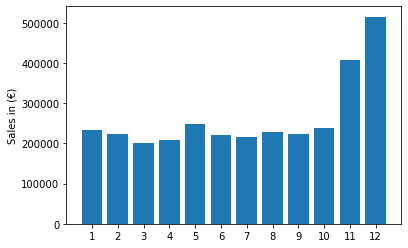

In [20]:

months = range(1,13)

plt.bar(months, months_res['All sales'])
plt.xticks(months)
plt.ylabel("Sales in (€)")

In [21]:
months_res['All sales']

0     232505.0
1     223293.0
2     201032.0
3     209446.5
4     247001.5
5     221948.0
6     215293.5
7     228446.0
8     222674.5
9     237821.0
10    406398.0
11    514969.0
Name: All sales, dtype: float64

### Shop with highest number of sales by city

In [22]:
data_by_bus = annual_df.groupby('Purchase Country_City', as_index=False).sum()
data_by_bus.set_index('Purchase Country_City', inplace=False)
data_by_bus

,Purchase Country_City,Order ID,Quatity Ordered,Price Each,Month,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales
0,"Sim_Company_1,Beijing, China",26811818,345,158300,1457,94200.0,119600.0,25670.0,239470.0
1,"Sim_Company_10,Manila, Philippines",15245188,223,84950,897,49950.0,57546.0,35402.5,142898.5
2,"Sim_Company_11,Munich, Germany",15105439,220,82950,820,42350.0,75946.0,23630.0,141926.0
3,"Sim_Company_12,Hanoi, Vietnam",15997378,223,91300,930,51550.0,65918.0,34765.0,152233.0
4,"Sim_Company_13,Dhaka, Bangladesh",15003566,193,84250,921,53650.0,57040.0,14152.5,124842.5
5,"Sim_Company_14,Ankara, Turkey",12731771,170,69750,781,40900.0,54556.0,13855.0,109311.0
6,"Sim_Company_15,Isfahan, Iran",16885117,231,93650,1008,49600.0,73968.0,31705.0,155273.0
7,"Sim_Company_16,Giza, Egypt",12589665,171,70150,691,38450.0,58604.0,16915.0,113969.0
8,"Sim_Company_17,Islamabad, Pakistan",13728858,190,77900,785,44000.0,61042.0,19762.5,124804.5
9,"Sim_Company_18,Bangkok, Thailand",10456178,125,57950,608,36250.0,45310.0,0.0,81560.0


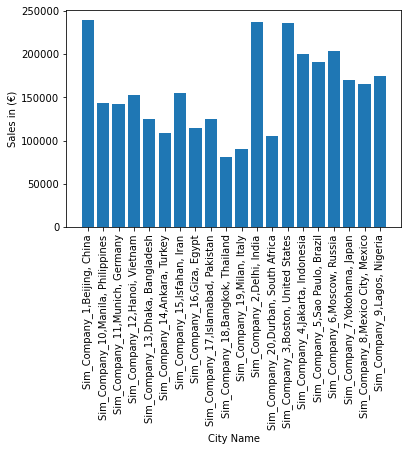

In [23]:
cities = [city for city, annual_df in data_by_bus.groupby('Purchase Country_City')]
plt.bar(cities, data_by_bus['All sales'])

plt.xticks(cities, rotation = 90)
plt.ylabel("Sales in (€)")
plt.xlabel('City Name')
plt.show()

In [24]:
annual_df.dtypes

Order ID                           int64
Phone                             object
Quatity Ordered                    int32
Price Each                         int32
Order Date                        object
Purchase Country_City             object
Month                              int32
No Discount - Single Purchase    float64
Sales_Less_Discount(8%)          float64
Sales_Less_Discount(15%)         float64
All sales                        float64
dtype: object

## Time Analysis

In [25]:
time_ana = annual_df
time_ana

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales
1201,124682,Samsung Galexy S21,6,800,01/01/22 08:50,"Sim_Company_9,Lagos, Nigeria",1,NaN,NaN,4080.0,4080.0
1074,124555,Huawei,2,350,01/01/22 10:47,"Sim_Company_12,Hanoi, Vietnam",1,NaN,644.0,NaN,644.0
1144,124625,Sony Xperia 10,3,700,01/01/22 17:28,"Sim_Company_5,Sao Paulo, Brazil",1,NaN,1932.0,NaN,1932.0
1226,124707,Huawei,2,350,01/01/22 20:11,"Sim_Company_18,Bangkok, Thailand",1,NaN,644.0,NaN,644.0
1236,124717,Google Android,3,900,01/01/22 22:29,"Sim_Company_9,Lagos, Nigeria",1,NaN,2484.0,NaN,2484.0
...,...,...,...,...,...,...,...,...,...,...,...
850,127367,Google Android,1,900,31/12/22 19:01,"Sim_Company_7,Yokohama, Japan",12,900.0,NaN,NaN,900.0
772,127289,Samsung Galexy S22,1,1100,31/12/22 19:17,"Sim_Company_4,Jakarta, Indonesia",12,1100.0,NaN,NaN,1100.0
420,126937,Samsung Galexy S10,2,300,31/12/22 21:20,"Sim_Company_5,Sao Paulo, Brazil",12,NaN,552.0,NaN,552.0
791,127308,iPhone 12,3,700,31/12/22 21:33,"Sim_Company_5,Sao Paulo, Brazil",12,NaN,1932.0,NaN,1932.0


In [26]:
time_ana['Order Date'] = pd.to_datetime(time_ana['Order Date'])

In [57]:
time_ana.dtypes

Order ID                                  int64
Phone                                    object
Quatity Ordered                           int32
Price Each                                int32
Order Date                       datetime64[ns]
Purchase Country_City                    object
Month                                     int32
No Discount - Single Purchase           float64
Sales_Less_Discount(8%)                 float64
Sales_Less_Discount(15%)                float64
All sales                               float64
Hour                                      int64
Minute                                    int64
dtype: object

In [75]:
time_ana['Hour'] = time_ana['Order Date'].dt.hour
time_ana['Minute'] = time_ana['Order Date'].dt.minute
time_ana['Count'] = 1
time_ana

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales,Hour,Minute,Count
1201,124682,Samsung Galexy S21,6,800,2022-01-01 08:50:00,"Sim_Company_9,Lagos, Nigeria",1,NaN,NaN,4080.0,4080.0,8,50,1
1074,124555,Huawei,2,350,2022-01-01 10:47:00,"Sim_Company_12,Hanoi, Vietnam",1,NaN,644.0,NaN,644.0,10,47,1
1144,124625,Sony Xperia 10,3,700,2022-01-01 17:28:00,"Sim_Company_5,Sao Paulo, Brazil",1,NaN,1932.0,NaN,1932.0,17,28,1
1226,124707,Huawei,2,350,2022-01-01 20:11:00,"Sim_Company_18,Bangkok, Thailand",1,NaN,644.0,NaN,644.0,20,11,1
1236,124717,Google Android,3,900,2022-01-01 22:29:00,"Sim_Company_9,Lagos, Nigeria",1,NaN,2484.0,NaN,2484.0,22,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,127367,Google Android,1,900,2022-12-31 19:01:00,"Sim_Company_7,Yokohama, Japan",12,900.0,NaN,NaN,900.0,19,1,1
772,127289,Samsung Galexy S22,1,1100,2022-12-31 19:17:00,"Sim_Company_4,Jakarta, Indonesia",12,1100.0,NaN,NaN,1100.0,19,17,1
420,126937,Samsung Galexy S10,2,300,2022-12-31 21:20:00,"Sim_Company_5,Sao Paulo, Brazil",12,NaN,552.0,NaN,552.0,21,20,1
791,127308,iPhone 12,3,700,2022-12-31 21:33:00,"Sim_Company_5,Sao Paulo, Brazil",12,NaN,1932.0,NaN,1932.0,21,33,1


InvalidIndexError: (slice(None, None, None), None)

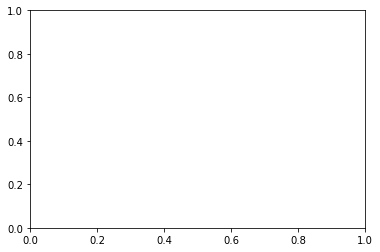

In [80]:
hours = [hour for hour, df in time_ana.groupby('Hour')]
plt.plot(hours, time_ana.groupby(['Hour']).count())

In [77]:
#time_ana.dtypes
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [78]:
hours = [hour for hour, df in time_ana.groupby('Hour')]
#plt.plot(hours, time_ana.groupby(['Hour']).count())
#hours = pd.Series(hours)
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [51]:
Check = time_ana.groupby(['Hour']).count()
Check
#hours

,Order ID,Phone,Quatity Ordered,Price Each,Order Date,Purchase Country_City,Month,No Discount - Single Purchase,Sales_Less_Discount(8%),Sales_Less_Discount(15%),All sales,Minute
Hour,,,,,,,,,,,,
0,71,71,71,71,71,71,71,39,29,3,71,71
1,41,41,41,41,41,41,41,24,14,3,41,41
2,18,18,18,18,18,18,18,14,4,0,18,18
3,9,9,9,9,9,9,9,5,4,0,9,9
4,9,9,9,9,9,9,9,4,4,1,9,9
5,23,23,23,23,23,23,23,15,8,0,23,23
6,35,35,35,35,35,35,35,22,11,2,35,35
7,64,64,64,64,64,64,64,29,29,6,64,64
8,117,117,117,117,117,117,117,68,39,10,117,117


InvalidIndexError: (slice(None, None, None), None)

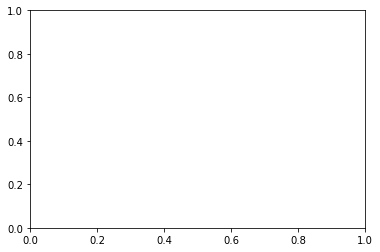

In [74]:
#plt.plot(time_ana.groupby(['Hour']).count())

x= hours
y = time_ana.groupby(['Hour']).count()
plt.plot(x,y)
plt.legend()

In [ ]:
time_ana.dtypes

In [ ]:
time_ana = time_ana.drop(['No Discount - Single Purchase', 'Sales_Less_Discount(8%)', 'Sales_Less_Discount(15%)'], axis=1)

In [ ]:
time_ana.dtypes

In [ ]:
time_ana

In [ ]:
data_by_hr = time_ana.groupby('Hour', as_index=False).count()
data_by_hr.set_index('Purchase Country_City', inplace=False)
data_by_hr.head()

In [ ]:
hours = [hour for hour, time_ana in time_ana.groupby('Hour')]

hours

In [ ]:
df_x = (data_by_hr.groupby(['Hour'], as_index=False).sum())
df_x

In [ ]:
df_x.reset_index()
df_x

In [ ]:
plt.plot(hours, df_x.groupby(['Month']))